# Binary Search Tree. HW 5.4


**INSTRUCTIONS**

Below is code for a Binary Search Tree Class. Seven of the methods in this implementation are incomplete : `find`, `size`, `preorder`, `inorder`, `postorder`, \_\_str\_\_ and `height`. It is your task to complete them. Use the testing code to test and confirm your implementation. Submit the completed notebook file (BOTH the .ipynb and a rendered .html).

**Note:** Finding the height of a binary tree is a common tech interview question.

**POINT VALUES: (TOTAL=100)**  

| method| points |
| :----| ---- |
| find | 15   |
| size | 10   |
| inorder | 15   |
| preorder | 15   |
| postorder | 15   |
| str | 20   |
| height | 10  |

---

**ABOUT THE CLASSES**

The `Node` class describes the structure of a node in the tree: each node has a data item and can have a left and right child.

The `BinarySearchTree` class is responsible for tree-level methods such as `buildBST`, inserting a data value in the right place/node in the BST tree (we populate the tree given a list data values through main), and the tree traversal methods.

---

In [3]:
# -*- coding: utf-8 -*-
"""
Binary Search Tree
Plus tree traversal methods

NOTE: I placed return statements immediately after the function declarations so
you can run the code and see the print statments before beginning the assignment.
HOWEVER ... You will need to move the return statements to the end of the functions
once you complete each function implementation :)
"""
import matplotlib.pyplot as plt
import networkx as nx

class Node:

      def __init__(self, data): # Constructor of Node class
            # A node has a data value, a left child node and a right child node
          self.data = data  #data item
          self.left = None  #left child, initially empty
          self.right = None #right child, initially empty


      def __str__(self): # Printing a node

          return str(self.data) #return as string

# ===================================================================
# ===================================================================

class BinarySearchTree:

      def __init__(self): # Constructor of BinarySearchTree class

          self.root = None  # Initially, an empty root node
          self.edge_list = []
# ===================================================================
      def buildBST(self, val):  # Build ("create") a binary search tree
        """
        Inserts a new value into the binary search tree.

        Args:
            val: The value to be inserted into the tree.
        """
        if self.root is None:  # If the tree is empty
            self.root = Node(val)  # Create the root node with the given value
        else:
            current = self.root  # Start from the root node
            while True:
                if val < current.data:  # If the value is less than the current node's data

                    if current.left:  # If there is a left child
                        current = current.left  # Move to the left child
                    else:

                        current.left = Node(val)  # Create a new left child with the given value
                        break  # Exit the loop once the value is inserted

                elif val > current.data:  # If the value is greater than the current node's data
                    if current.right:  # If there is a right child
                        current = current.right  # Move to the right child
                    else:


                        current.right = Node(val)  # Create a new right child with the given value
                        break  # Exit the loop once the value is inserted

                else:  # If the value is already present in the tree
                    break  # Exit the loop to avoid duplicates



# ===================================================================
      def find(self, target):   # Find a node with the 'target' value in the BST
        """
        returns true if found, false otherwise
        """
        current = self.root  # Start from the root node

        while True:    
            if target < current.data:  # If the value is less than the current node's data

                if current.left:  # If there is a left child
                    current = current.left  # Move to the left child
                else:
                    return False

            elif target > current.data:  # If the value is greater than the current node's data

                if current.right:  # If there is a right child
                    current = current.right  # Move to the right child
                else:
                    return False

            elif target == current.data:
                
                return True
        
                # Exit the loop to avoid duplicates
        

# ===================================================================
      def size(self, node):  # Counts the number of nodes in the BST
        """
        returns number of nodes
        """

        if node == None: 
            return 0
        else:
            return 1 + self.size(node.left) + self.size(node.right)        

# ===================================================================
      def inorder(self, node): # Performing in-order tree traversal
        """
        prints values as encountered inorder
        """
        if node == None:
            return []

        left_list = self.inorder(node.left)
        right_list = self.inorder(node.right)
        return left_list + [node.data] + right_list

        

# ===================================================================
      def preorder(self, node):  # Performing pre-order tree traversal
        """
        prints values as encountered preorder
        """
        if node == None:
            return []

        left_list = self.preorder(node.left)
        right_list = self.preorder(node.right)
        return [node.data] + left_list + right_list
        

# ===================================================================
      def postorder(self, node):  # Performing post-order tree traversal
        """
        prints values as encountered postorder
        """
        if node == None:
            return []

        left_list = self.postorder(node.left)
        right_list = self.postorder(node.right)
        return left_list + right_list + [node.data]
        
      def postorder_edge(self, node):  # Performing post-order tree traversal
 
        if node == None:
            return []

        if node.left: 
            self.edge_list.append((node.data, node.left.data))
            self.postorder_edge(node.left)

        if node.right: 
            self.edge_list.append((node.data, node.right.data))
            self.postorder_edge(node.right)

        


# ===================================================================
      def __str__(self):
        """
        Builds networkx visualization of the BST

        The purpose of this method is to render a visualization of a constructed BST
        Tree to confirm correctness.

        Hint: To complete this you will need to create a node list, edge list, and/or
        an adjacency matrix. You can then easily construct a graph visualization using networkx.

        Slightly alter one of your traversal methods (or the buildBST method)
        above so that the appropriate structure(s) is constructed and saved as
        an attribute(s) to the BST class, eg, edgeList.

        Hint: Use a directed graph (DiGraph) so you can more easily
        identify the root, leaf, and internal nodes. The standard networkx method
        draw will suffice. It will render the tree as a standard graph (ie no clear root),
        but you can determine which node is the root if you use a DiGraph.

        Once the graph is constructed, a plot is created.
        """

        def get_edge_list():

            self.edge_list = []
            self.postorder_edge(self.root)

            return self.edge_list

        a = get_edge_list()
        
        H = nx.Graph(a)

        nx.draw(H, with_labels=True, node_size=500, font_size=10, font_weight="bold")

        return ''
        # Revisit previous exercises and examples using Networkx to help!
        # See docs here to help https://networkx.org/documentation/stable/tutorial.html
        # Insert Code to diplay figure here

# ===================================================================
      def height(self, node):
        """
        prints tree height
        """
        
        if node == None:
            return 0
        else:
            return 1 + max(self.height(node.left), self.height(node.right))


# ===================================================================


What's the size of the tree?
9
What's the size of the tree?
0

In-order Tree Traversal:
[1, 3, 4, 6, 7, 8, 10, 13, 14]

Pre-order Tree Traversal:
[8, 3, 1, 6, 4, 7, 10, 14, 13]

Post-order Tree Traversal:
[1, 4, 7, 6, 3, 13, 14, 10, 8]

Find 7: True
Find 5: False
Find 30: False


Display Figure of Tree:
[(8, 3), (3, 1), (3, 6), (6, 4), (6, 7), (8, 10), (10, 14), (14, 13)]


Height of the Tree:
4


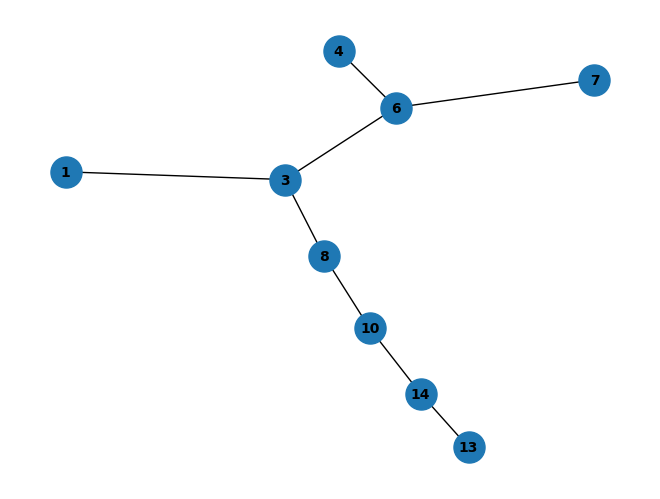

In [4]:
##################
## Testing Code ##
##################

tree = BinarySearchTree()
treeEmpty = BinarySearchTree()  # Empty tree

arr = [8,3,1,6,4,7,10,14,13]    # Array of nodes (data items)
for i in arr:                   # For each data item, build the Binary Search Tree
    tree.buildBST(i)

print('What\'s the size of the tree?')
print(tree.size(tree.root))     # size method

print('What\'s the size of the tree?')
print(treeEmpty.size(treeEmpty.root))

print("")
print ('In-order Tree Traversal:')
a = tree.inorder(tree.root)         # Perform in-order tree traversal, and print
print(a)

print("")
print ('Pre-order Tree Traversal:')
b = tree.preorder(tree.root)        # Perform pre-order tree traversal, and print
print(b)

print("")
print ('Post-order Tree Traversal:')
c = tree.postorder(tree.root)       # Perform post-order tree traversal, and print
print(c)

print("")
print ('Find 7:', end=" ")      # find method
print(tree.find(7))

print('Find 5:', end=" ")
print(tree.find(5))

print('Find 30:', end=" ")
print(tree.find(30))

print("")
print("")
print ('Display Figure of Tree:')
print(tree)

print("")
print('Height of the Tree:')
print(tree.height(tree.root))